<div style="float: right;">
<img hr width="40%" src="http://static.wixstatic.com/media/d90f6c_6e807fca36354d06b524167b040d3315.jpg_srz_p_221_241_75_22_0.50_1.20_0.00_jpg_srz">
</div>
<h1>EEGex</h1>
<i>some EEG basics with Python</i>     

---
<h3>Description:</h3>
The purpose of this notebook is to illustrate some basic principles of spectral analysis of EEG data with python. It turned out to get a bit expansive... Below, I test out the [<i>plotly api for python</i>](https://plot.ly/python/getting-started/) (allows conversion of plots from matplotlib to plotly and interactive displays in the notebook), as well as the [<i>pymatbridge connector</i>](https://github.com/arokem/python-matlab-bridge) (allows running a matlab session within the notebook and straightforwardly issuing matlab commands with the %%matlab cell magic command), and also some methods for generating topo-plots and head models in python.
 
 
Amazingly, matplotlib does not appear to support plotting of 3d triangular meshes without implicit parametric surface structure (i.e that really common structure everyone uses in which vertex coordinates are specified along with "faces" which detail their connectivity). The best alternative I've found for doing this (and indeed, a pretty promising and cool bit of software) is called [<i>Mayavi</i>](http://docs.enthought.com/mayavi/mayavi/). This notebook also has the goal of loading the mayavi module and using it to plot some 3d triangular mesh heads. Mayavi itself can be installed pretty straightforwardly through pip or conda (requires a few prerequisite modules), but to get it to run with ipython notebooks I had to install <i>PySide</i> and specify it as the qt binding by adding the following lines to .bashrc    
<i>
export QT_API='pyside'    
export ETS_TOOLKIT='qt4'</i>  


<h3>Notes:</h3>
<i>1)</i> **IMPORTANT** You won't just be able to download and run these notebooks in their entirety. Specifically, the part where I test the pymatbridge connector depends on having my "cdlcode" repository linked on your matlab path. I am currently resturcturing (and renaming) this code and will make it available in its new form soon. For the other examples, you will need the following .mat files (which you should be able to obtain via the links below) and will need to make some cosmetic modifications to specify the appropriate paths on your machine:   
[<i>'fakeEEG.mat'</i>](https://www.dropbox.com/s/kt0g3qys46g2p8q/fakeEEG.mat?dl=0)    
[<i>'H65_headmodel_AdultJER.mat'</i>](https://www.dropbox.com/s/b2xzlmn6yvq5lc0/H65_headmodel_AdultJER.mat?dl=0)    
[<i>'jerAdT1_align_H129_fullHM.mat'</i>](https://www.dropbox.com/s/5ach6icy1j4rnwb/jerAdT1_h129_fullHM.mat?dl=0)    



<i>2)</i> This notebook also tests out the imayavi plugin obtained here:
<i>https://gist.github.com/KristoforMaynard/e41abdd59c5308eacf84</i>   
It appears to work pretty well, but apparently you can't mix together calls to mlab.show() and the inline imayavi plugin. If imayavi is loaded first and inline plots made, then then the regular call to mlab.show() is unresponsive. If the mlab.show() call is made first, then subsequent inline plots will display both inline and outside the notebook, but the resultant figure window becomes unresponsive and the notebook kernel dies.    
   
<i>3)</i> Apparently, with a little work, mayavi plots can be integrated together with/operated on by commands from matplotlib.pyplot. I haven't tried this yet.   
   
<i>4)</i> Currently, there is a warning message displayed when the mlab module is loaded... "WARNING:traits.has_traits:DEPRECATED: traits.has_traits.wrapped_class, 'the 'implements' class advisor has been deprecated. Use the 'provides' class decorator." I am not currently sure how serious this is.
   

   
<h4>By Sam Thorpe</h4>
<i>Written November 03, 2015</i>  

    
---


In [32]:
# # Module Imports
# -----------------------------------------------------|
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import plotly.plotly as py
import scipy.io as sio
import scipy.interpolate as spi
from mayavi import mlab
%matplotlib inline  

<h2>EEGex1</h2>
<i>computes/plots EEG time-series and power spectrum</i>     

---
<h4>Description:</h4>
The purpose of this function is to illustrate the basic principles of the FFT applied to some example EEG data. It takes as input a channel number and epoch number and returns plots of the corresponding EEG time series and spectrum. This first example loads some data from a .mat file (Matlab format) since I have a lot of those laying around (later I will try to show how to load EGI binary files into python directly).   


<h4>Inputs:</h4>
chan: channel index (can range from 1-65)   
epoch: epoch index (can range from 1-40)   
maxf: max frequency to display in plot (Hz)    

 
<h4>Outputs:</h4>
plots time series and power spectrum of the EEG at the specified channel and epoch    

  
<h4>Notes:</h4>
Examples of usage:    
EEGex1(20,2)   

---

In [35]:
def EEGex1(*arg):
    ''' computes/plots EEG time-series and power spectrum at specified channel/epoch'''

    # # Load data & get spectra
    # -----------------------------------------------------|
    chan, epoch = arg
    dd = sio.loadmat('fakeEEG.mat')
    dat = dd['data']                      # matlab 3d-matrix loads as numpy array
    info = dd['info'].view(np.recarray)   # matlab structure loads as messy numpy "structured array"

    # # Get time-series and compute spectrum
    N = 1.
    sr = info.sr[0][0][0][0]              # not sure why these arrays are so heavily nested
    samps = np.arange(int(N*sr))
    t = info.time[0][0][0][samps]
    y = dat[samps,chan,epoch]
    yF = np.fft.fft(y)/len(y)
    df = sr/len(yF)
    freqs = np.r_[0:sr:df]
    yS = np.abs(yF)


    # # Plots
    # -----------------------------------------------------|
     
    # # Plot time-series
    plt.figure(1)
    plt.plot([0,N],[0,0],linewidth=3,linestyle='--',color=[0.65,0.65,0.65])
    plt.plot(t,y,linewidth=3,color='b') 
    plt.rc('font', **{'weight':'bold','size':15})
    plt.xlabel('Time (sec)',fontweight='bold',fontsize=15)
    plt.ylabel(r'Amplitude ($\mu$V)',fontweight='bold')
    plt.title('Example EEG: Time Series',fontweight='bold',fontsize=17)
    plt.grid(True)
    yL = max(np.abs(y))
    plt.axis([0,N,-yL,yL])
    
    # # Plot Spectrum
    plt.figure(2)
    plt.bar(freqs,yS,align='center',facecolor='b')
    plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=15)
    plt.ylabel(r'Amplitude ($\mu$V)',fontweight='bold',fontsize=15)
    plt.title('Example EEG: Amplitude Spectrum',fontweight='bold',fontsize=17)
    plt.grid('on')
    plt.gca().set(xlim=[0,50]);

    plt.show()
    
    

<h3>Call EEGex1 ...</h3>

---
Summary of what to play around with in this example...


---     

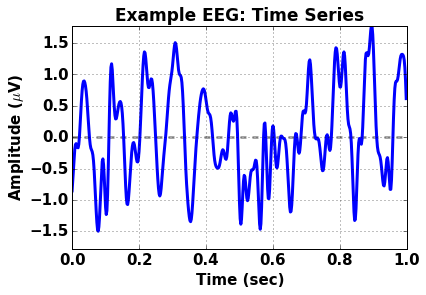

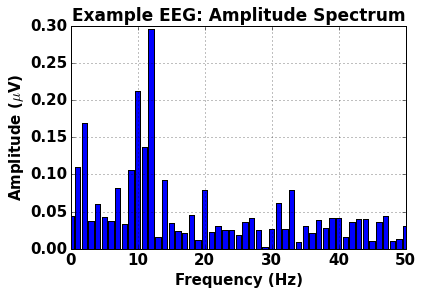

In [36]:
chan = 20
epoch = 2
EEGex1(chan,epoch)

<h2>EEGex2</h2>
<i>time-series and spectra across channels</i>     

---
<h4>Description:</h4>
The purpose of this function is to illustrate the basic principles of the FFT applied to some example EEG data. It takes as inputs epoch number and frequency band, and returns plots of the corresponding EEG time series, spectrum, (and band-specific topography?).


<h4>Inputs:</h4>
epoch: epoch index (can range from 1-40)   
band: two-element list specifying begeinning/end of band (Hz)

 
<h4>Outputs:</h4>
plots full channel array (overlaid) of time series and power spectra, and I will try to maybe get the band specific topography working too.

  
<h4>Notes:</h4>
This is a good example to review differences between Matlab and Numpy with regards to array indexing, specifying axis of operation for multidimensional array operations, etc.     
Examples of usage:    
EEGex2(2,[8,12])   

---

In [11]:
def EEGex2(*arg):
    '''time-series and spectra across channels'''

    # # Load data & get spectra
    # -----------------------------------------------------|
    epoch, band = arg
    dd = sio.loadmat('fakeEEG.mat')
    dat = dd['data']                      # matlab 3d-matrix loads as numpy array
    info = dd['info'].view(np.recarray)   # matlab structure loads as messy numpy "structured array"

    # # Get time-series and compute spectrum
    chans = np.arange(60)
    N = 2.
    sr = info.sr[0][0][0][0]              # not sure why these arrays are so heavily nested
    samps = np.arange(int(N*sr))
    t = info.time[0][0][0][samps]
    y = dat[0:N*sr,0:65,epoch]                  # Important Matlab/Numpy indexing differences!
    #y = dat[samps,:,:][:,chans,:][:,:,epoch]   # alternatively...
    #y = dat[:,:,epoch][np.ix_(samps,chans)]    # alternatively...

    # # Compute spectrum
    yF = np.fft.fft(y,axis=0)/y.shape[0]        #crazy, but you have to specify the first axis
    df = float(sr)/yF.shape[0]
    freqs = np.r_[0:sr:df]
    yS = np.abs(yF)
    bins = np.array([i for i in range(len(freqs)) if (freqs[i]<=band[1] and freqs[i]>=band[0])])
    ySb = yS[bins,:].mean(axis=0)
    
    
    # # Plots
    # -----------------------------------------------------|
    tmplines = []
    for q in range(ySb.shape[0]):
        tmplines.append('channel #%i' % (q+1))
    figs = []
    
    # # Plot time-series
    ftmp = plt.figure(2); figs.append(ftmp)
    plt.plot([0,N],[0,0],linewidth=3,linestyle='--',color=[0.65,0.65,0.65])
    #plt.plot(t,y,linewidth=2)
    for q in range(y.shape[1]):
        plt.plot(t,y[:,q],linewidth=2,label=tmplines[q])
    plt.rc('font', **{'weight':'bold','size':15})
    plt.xlabel('Time (sec)',fontweight='bold',fontsize=15)
    plt.ylabel(r'Amplitude ($\mu$V',fontweight='bold',fontsize=15)
    plt.title('Example EEG: Time Series',fontweight='bold',fontsize=17)
    plt.grid(True)
    yL = [-max(abs(y.flatten())),max(abs(y.flatten()))]
    plt.axis([0,N,yL[0],yL[1]])
    
    # # Plot spectrum
    ftmp = plt.figure(1); figs.append(ftmp)
    #plt.plot(freqs,yS,linewidth=2)
    for q in range(y.shape[1]):
        plt.plot(freqs,yS[:,q],linewidth=2,label=tmplines[q])
    plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=15)
    plt.ylabel(r'Amplitude ($\mu$V)',fontweight='bold',fontsize=15)
    plt.title('Example EEG: Amplitude Spectrum',fontweight='bold',fontsize=17)
    plt.grid(True)
    yL = [0,1.1*max(yS.flatten())]
    plt.axis([0,50,yL[0],yL[1]])
    
    plt.show()
    return figs,ySb
    

<h3>Call EEGex2 ...</h3>

---

    

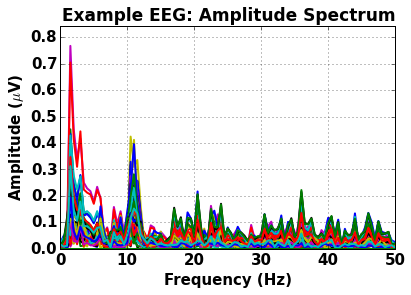

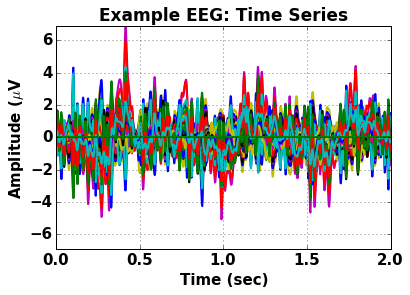

In [12]:
alpha_band = [8,12]
figs,ySb = EEGex2(2,alpha_band)

<h3>EEGex2 output with plotly</h3>
<i>test out plotly api for matplotlib</i>    

---
There are a lot of nice things you can do with plotly... (expand). This example basically just gives you the functionality of Siyi's plotx function, with the interactive labeling embedded in the notebook.

---

In [37]:
py.iplot_mpl(figs[1])

The draw time for this plot will be slow for clients without much RAM.


<h3>No topo-plots with matplotlib...</h3>
<i>The problem is lack of support for irregular 3d-triangular meshes</i>   

---
Matplotlib 3d functionality is either oddly hard to google or just pretty weak... Follow up, I did some fairly extensive googling and have arrived at the conclusion that our topo plots are outside the current 3d capabilites of matplotlib. Fortunately there is an alternative called <i>mayavi</i> which I will attempt at the end of this notebook. But first a quick detour.

---



<h3>Matlab Topo plots</h3>
<i>demo the pymatbridge plugin</i>   

---
We all know these topo plots are very straightforward to make in matlab, but did you know you can run matlab code in ipython notebooks? You just need to install the pymatbridge module (with pip or conda) and load it in ipython  (as done below) using cell magic:    
<i>%load_ext pymatbridge</i>

---



In [14]:
#load the pymatbridge module
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-54ee2ea4-7589-4fd0-ae74-b42318153a34
Send 'exit' command to kill the server
....MATLAB started and connected!


In [15]:
%%matlab
current = pwd;
cd /home/sam/allcode/matlab
startup('cdlcode')
cd(current)

   
dbstopmode ON
samcode linked
cdlcode linked
   


In [20]:
%%matlab

epoch = 2;
maxf = 50;
band = [8 12];
load('fakeEEG.mat');

N = 2;
sr = info.sr;
samps = 1:N*sr;
gce = 1:60;
t = info.time(samps);
y = data(samps,gce,epoch);
yF = fft(y)/length(y);
df = sr/length(yF);
freqs = 0:df:sr-df;
bi = find(freqs>=band(1) & freqs<=band(end));
yS = abs(yF);



<h4>Plot alpha band topography</h4>
<i> 8 - 12 Hz using topo3_genhm.m</i>   
    

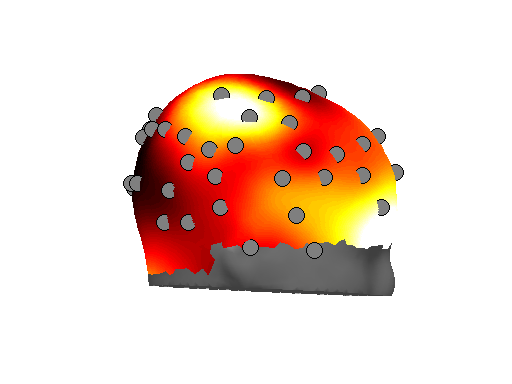

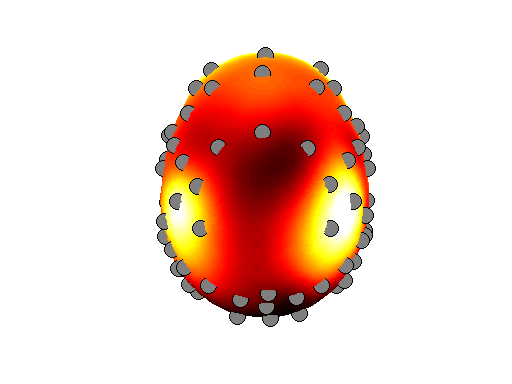

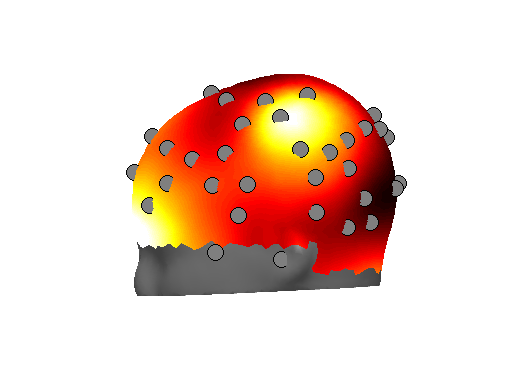

In [22]:
%%matlab

hm = 'H65_headmodel_AdultJER.mat';
gce = 1:60;
topdat = zeros(1,65); 
topdat(gce) = mean(yS(bi,:));
vw = {[90 0],[0 90],[-90 0]};
for q = 1:length(vw)
    topo3_genhm(hm,topdat,gce);
    camzoom(0.85);
    view(vw{q}(1),vw{q}(2));
    axis('off');
end



<h3>Topo plots with Mayavi</h3>
<i> very happy to finally get this working...</i>

---
The [<i>Mayavi</i>](http://docs.enthought.com/mayavi/mayavi/) python module actually turned out to be fairly straightforward to use, but fairly tricky to set up... add more detail here soon. In this demonstration I am going to load an hnl-style headmodel I made from an MRI template coregistered with egi h65-channel electrode net, then use th mayavi module and imayavi plugin to make topo plots for the same data as shown above.

---     

In [38]:
#Load the required modules
%load_ext imayavi

The imayavi extension is already loaded. To reload it, use:
  %reload_ext imayavi


In [39]:
# # Load head model
hm = sio.loadmat('/home/sam/allcode/matlab/cdlcode/env/headmodels/JER/H65_headmodel_AdultJER.mat')
#hm.keys()

# # Head vertices, and faces
v = hm['vertex_matrix']
x = v[:,0]; y = v[:,1]; z = v[:,2]
f = hm['face_matrix']-1        #python 0-indexing

# # EEG interpolation surface vertices, and faces
ev = hm['EEG_vertex_matrix']
ex = ev[:,0]; ey = ev[:,1]; ez = ev[:,2]
ef = hm['EEG_face_matrix']-1    #python 0-indexing

# # Electrode positions
elec = hm['elec'].view(np.recarray)
ep = elec.pos[0][0]
epx = ep[:,0]; epy = ep[:,1]; epz = ep[:,2]

In [40]:
# get topo data using Rbf interpolatorsampling
elecdat = ySb
rbfi = spi.Rbf(epx,epy,epz,elecdat,function='linear')
scalpdat = rbfi(ex,ey,ez)                         

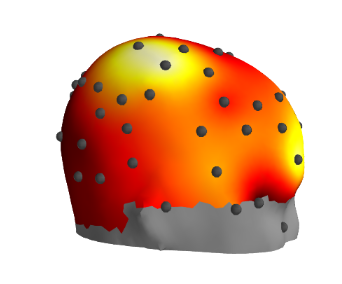

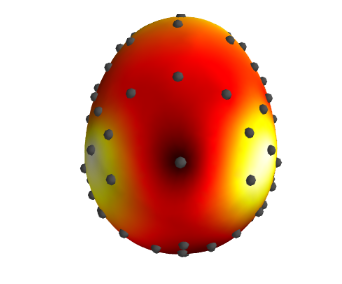

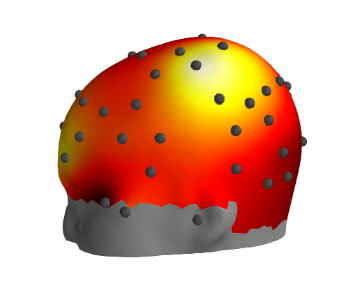

In [42]:
# # 3-view inline plots
vw = [[0,90],[0,0],[180,90]]
for q in range(len(vw)):
    s = mlab.triangular_mesh(x,y,z,f,color=(0.5,0.5,0.5))
    mlab.triangular_mesh(ex,ey,ez,ef,scalars=scalpdat,colormap='hot')
    mlab.points3d(epx,epy,epz,color=(0.3,0.3,0.3),scale_factor=8)
    mlab.view(vw[q][0],vw[q][1],distance=375)
    imayavi_show_inline()
    mayavi.mlab.close()

<h3> Sam-style fullHM head model</h3>
<i>restructure and try to plot...</i>

---

In [43]:
hm = sio.loadmat('/media/sam/DATA2/headmodels/jerAdT1_align_H129/bem/jerAdT1_align_H129_fullHM.mat')
#hm = sio.loadmat('/media/sam/DATA2/headmodels/HNL_S05/bem/HNL_S05_fullHM.mat')
#hm.keys()

n = hm['n'].view(np.recarray)
f = hm['f'].view(np.recarray)
elec = hm['elec'].view(np.recarray)
ep = elec.pos[0][0]
epx = ep[:,0]; epy = ep[:,1]; epz = ep[:,2]

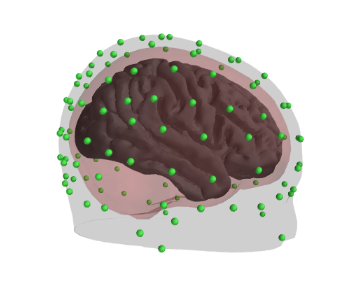

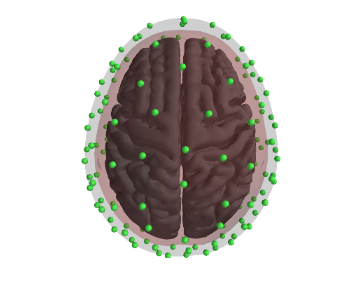

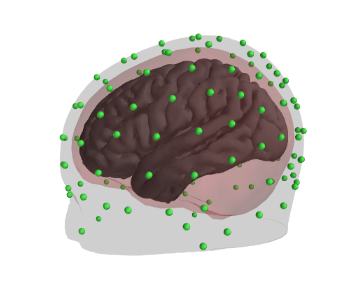

In [44]:
# # 3-view inline plots
vw = [[0,90],[0,0],[180,90]]
layers = ['source','csf','scalp']
clr = [(0.3,0.3,0.3),(0.9,0.3,0.3),(0.,0.,0.)]
alph = [1.,0.2,0.1]

for q in range(len(vw)):
    for k in range(len(layers)):
    
        x = n[layers[k]][0][0][:,0]
        y = n[layers[k]][0][0][:,1]
        z = n[layers[k]][0][0][:,2]
        face = f[layers[k]][0][0]-1
        s = mlab.triangular_mesh(x,y,z,face,color=clr[k],opacity=alph[k])
        
    mlab.points3d(epx,epy,epz,color=(0.3,0.9,0.3),scale_factor=5)
    #mlab.view(vw[q][0],vw[q][1],distance = 420)  #S05
    mlab.view(vw[q][0],vw[q][1],distance = 375)   #Adult JER
    imayavi_show_inline()
    mayavi.mlab.close()